# PARTE 1.1: EXAMINATION DATA CLEAN UP

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

## Blood Pressure - Oscillometric Measurement  (P_BPXO)

In [ ]:
bloodP_2017 = pd.read_csv("/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/P_BPXO_2017.csv")
bloodP_2015 = pd.read_csv("/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/BPX_I_2015.csv")

### Codebook 2017-2020

*   SEQN - Respondent sequence number
*   BPAOARM - Arm selected - oscillometric
*   BPAOCSZ - Coded cuff size - oscillometric
*   BPXOSY1 - Systolic - 1st oscillometric reading
*   BPXODI1 - Diastolic - 1st oscillometric reading
*   BPXOSY2 - Systolic - 2nd oscillometric reading
*   BPXODI2 - Diastolic - 2nd oscillometric reading
*   BPXOSY3 - Systolic - 3rd oscillometric reading
*   BPXODI3 - Diastolic - 3rd oscillometric reading
*   BPXOPLS1 - Pulse - 1st oscillometric reading
*   BPXOPLS2 - Pulse - 2nd oscillometric reading
*   BPXOPLS3 - Pulse - 3rd oscillometric reading

Vamos a condensar las 3 medidas del pulso en 1 sola con la media y la SD. Y borrar algunas que no son relevates (a priori)

In [ ]:
bloodP_2017.head()

SEQN BPAOARM  BPAOCSZ  BPXOSY1  BPXODI1  BPXOSY2  BPXODI2  BPXOSY3  \
0  109264.0    b'R'      3.0    109.0     67.0    109.0     68.0    106.0   
1  109266.0    b'R'      4.0     99.0     56.0     99.0     55.0     99.0   
2  109270.0    b'R'      3.0    123.0     73.0    124.0     77.0    127.0   
3  109271.0    b'R'      4.0    102.0     65.0    108.0     68.0    111.0   
4  109273.0    b'R'      3.0    116.0     68.0    110.0     66.0    115.0   

   BPXODI3  BPXOPLS1  BPXOPLS2  BPXOPLS3  
0     66.0      94.0      95.0      91.0  
1     52.0      68.0      66.0      66.0  
2     70.0      95.0      98.0      93.0  
3     68.0      73.0      71.0      70.0  
4     68.0      71.0      70.0      70.0

In [ ]:
bloodP_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11656 entries, 0 to 11655
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      11656 non-null  float64
 1   BPAOARM   11656 non-null  object 
 2   BPAOCSZ   10373 non-null  float64
 3   BPXOSY1   10352 non-null  float64
 4   BPXODI1   10352 non-null  float64
 5   BPXOSY2   10327 non-null  float64
 6   BPXODI2   10327 non-null  float64
 7   BPXOSY3   10286 non-null  float64
 8   BPXODI3   10286 non-null  float64
 9   BPXOPLS1  9471 non-null   float64
 10  BPXOPLS2  9448 non-null   float64
 11  BPXOPLS3  9412 non-null   float64
dtypes: float64(11), object(1)
memory usage: 1.1+ MB


In [ ]:
bloodP_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9544 entries, 0 to 9543
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      9544 non-null   float64
 1   PEASCCT1  236 non-null    float64
 2   BPXCHR    1938 non-null   float64
 3   BPAARM    7398 non-null   float64
 4   BPACSZ    7386 non-null   float64
 5   BPXPLS    7376 non-null   float64
 6   BPXPULS   9314 non-null   float64
 7   BPXPTY    7376 non-null   float64
 8   BPXML1    7371 non-null   float64
 9   BPXSY1    7145 non-null   float64
 10  BPXDI1    7145 non-null   float64
 11  BPAEN1    7145 non-null   float64
 12  BPXSY2    7313 non-null   float64
 13  BPXDI2    7313 non-null   float64
 14  BPAEN2    7313 non-null   float64
 15  BPXSY3    7276 non-null   float64
 16  BPXDI3    7276 non-null   float64
 17  BPAEN3    7276 non-null   float64
 18  BPXSY4    324 non-null    float64
 19  BPXDI4    324 non-null    float64
 20  BPAEN4    324 non-null    floa

Variables no relevantes:
*   BPAOARM - Arm selected - oscillometric
*   BPAOCSZ - Coded cuff size - oscillometric

In [ ]:
bloodP_2017 = bloodP_2017.drop(['BPAOARM', 'BPAOCSZ'], axis=1)

In [ ]:
#Hacemos la media y SD de Systolic - 1st, 2nd and 3rd oscillometric reading
bloodP_2017['Systolic_mean'] = bloodP_2017[['BPXOSY1', 'BPXOSY2', 'BPXOSY3']].mean(axis=1)
bloodP_2017['Systolic_SD'] = bloodP_2017[['BPXOSY1', 'BPXOSY2', 'BPXOSY3']].std(axis=1)

In [ ]:
bloodP_2017[['Systolic_mean', 'Systolic_SD']].head()

Systolic_mean  Systolic_SD
0     108.000000     1.732051
1      99.000000     0.000000
2     124.666667     2.081666
3     107.000000     4.582576
4     113.666667     3.214550

La desviacion no es muy alta. Nos quedamos con la media

In [ ]:
#Hacemos la media y SD de Diastolic
bloodP_2017['Diastolic_mean'] = bloodP_2017[['BPXODI1', 'BPXODI2', 'BPXODI3']].mean(axis=1)
bloodP_2017['Diastolic_SD'] = bloodP_2017[['BPXODI1', 'BPXODI2', 'BPXODI3']].std(axis=1)

In [ ]:
bloodP_2017[['Diastolic_mean', 'Diastolic_SD']].head()

Diastolic_mean  Diastolic_SD
0       67.000000      1.000000
1       54.333333      2.081666
2       73.333333      3.511885
3       67.000000      1.732051
4       67.333333      1.154701

La desviacion no es muy alta. Nos quedamos con la media

In [ ]:
# Hacemos la media de las tres medidas del pulso
bloodP_2017['Pulse_mean'] = bloodP_2017[['BPXOPLS1', 'BPXOPLS2', 'BPXOPLS3']].mean(axis=1)
bloodP_2017['Pulse_SD'] = bloodP_2017[['BPXOPLS1', 'BPXOPLS2', 'BPXOPLS3']].std(axis=1)

In [ ]:
bloodP_2017[['Pulse_mean', 'Pulse_SD']].head()

Pulse_mean  Pulse_SD
0   93.333333  2.081666
1   66.666667  1.154701
2   95.333333  2.516611
3   71.333333  1.527525
4   70.333333  0.577350

La desviacion no es muy alta. Nos quedamos con la media

In [ ]:
# Nos quedamos con las columnas de media solo
bloodP_2017 = bloodP_2017.drop(['BPXOSY1', 'BPXOSY2', 'BPXOSY3', 'BPXODI1', 'BPXODI2', 'BPXODI3', 'BPXOPLS1', 'BPXOPLS2', 'BPXOPLS3', 'Pulse_SD', 'Diastolic_SD', 'Systolic_SD'], axis=1)

In [ ]:
bloodP_2017.head()

SEQN  Systolic_mean  Diastolic_mean  Pulse_mean
0  109264.0     108.000000       67.000000   93.333333
1  109266.0      99.000000       54.333333   66.666667
2  109270.0     124.666667       73.333333   95.333333
3  109271.0     107.000000       67.000000   71.333333
4  109273.0     113.666667       67.333333   70.333333

In [ ]:
bloodP_2015.head()

SEQN  PEASCCT1  BPXCHR  BPAARM  BPACSZ  BPXPLS  BPXPULS  BPXPTY  BPXML1  \
0  83732.0       NaN     NaN     1.0     4.0    76.0      1.0     1.0   150.0   
1  83733.0       NaN     NaN     1.0     4.0    72.0      1.0     1.0   170.0   
2  83734.0       NaN     NaN     1.0     4.0    56.0      1.0     1.0   160.0   
3  83735.0       NaN     NaN     1.0     5.0    78.0      1.0     1.0   150.0   
4  83736.0       NaN     NaN     1.0     3.0    76.0      1.0     1.0   130.0   

   BPXSY1  ...  BPAEN1  BPXSY2  BPXDI2  BPAEN2  BPXSY3  BPXDI3  BPAEN3  \
0   128.0  ...     2.0   124.0    64.0     2.0   116.0    62.0     2.0   
1   146.0  ...     2.0   140.0    88.0     2.0   134.0    82.0     2.0   
2   138.0  ...     2.0   132.0    44.0     2.0   136.0    46.0     2.0   
3   132.0  ...     2.0   134.0    68.0     2.0   136.0    70.0     2.0   
4   100.0  ...     2.0   114.0    54.0     2.0    98.0    56.0     2.0   

   BPXSY4  BPXDI4  BPAEN4  
0     NaN     NaN     NaN  
1     NaN     NaN     NaN  
2     NaN     NaN     NaN  
3     NaN     NaN     NaN  
4     NaN     NaN     NaN  

[5 rows x 21 columns]

In [ ]:
#Renombrar "BPXCHR" por Pulse_mean
bloodP_2015.rename(columns={'BPXPLS':'Pulse_mean'}, inplace=True)

In [ ]:
bloodP_2015.head()

SEQN  PEASCCT1  BPXCHR  BPAARM  BPACSZ  Pulse_mean  BPXPULS  BPXPTY  \
0  83732.0       NaN     NaN     1.0     4.0        76.0      1.0     1.0   
1  83733.0       NaN     NaN     1.0     4.0        72.0      1.0     1.0   
2  83734.0       NaN     NaN     1.0     4.0        56.0      1.0     1.0   
3  83735.0       NaN     NaN     1.0     5.0        78.0      1.0     1.0   
4  83736.0       NaN     NaN     1.0     3.0        76.0      1.0     1.0   

   BPXML1  BPXSY1  ...  BPAEN1  BPXSY2  BPXDI2  BPAEN2  BPXSY3  BPXDI3  \
0   150.0   128.0  ...     2.0   124.0    64.0     2.0   116.0    62.0   
1   170.0   146.0  ...     2.0   140.0    88.0     2.0   134.0    82.0   
2   160.0   138.0  ...     2.0   132.0    44.0     2.0   136.0    46.0   
3   150.0   132.0  ...     2.0   134.0    68.0     2.0   136.0    70.0   
4   130.0   100.0  ...     2.0   114.0    54.0     2.0    98.0    56.0   

   BPAEN3  BPXSY4  BPXDI4  BPAEN4  
0     2.0     NaN     NaN     NaN  
1     2.0     NaN     NaN     NaN  
2     2.0     NaN     NaN     NaN  
3     2.0     NaN     NaN     NaN  
4     2.0     NaN     NaN     NaN  

[5 rows x 21 columns]

In [ ]:
print(bloodP_2015.columns)

Index(['SEQN', 'PEASCCT1', 'BPXCHR', 'BPAARM', 'BPACSZ', 'Pulse_mean',
       'BPXPULS', 'BPXPTY', 'BPXML1', 'BPXSY1', 'BPXDI1', 'BPAEN1', 'BPXSY2',
       'BPXDI2', 'BPAEN2', 'BPXSY3', 'BPXDI3', 'BPAEN3', 'BPXSY4', 'BPXDI4',
       'BPAEN4'],
      dtype='object')


In [ ]:
# Nos quedamos con las mismas columnas que bloodP_2017
bloodP_2015 = bloodP_2015[['SEQN','Pulse_mean','BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2', 'BPXSY3', 'BPXDI3', 'BPXSY4', 'BPXDI4']]

In [ ]:
bloodP_2015.head()

SEQN  Pulse_mean  BPXSY1  BPXDI1  BPXSY2  BPXDI2  BPXSY3  BPXDI3  \
0  83732.0        76.0   128.0    70.0   124.0    64.0   116.0    62.0   
1  83733.0        72.0   146.0    88.0   140.0    88.0   134.0    82.0   
2  83734.0        56.0   138.0    46.0   132.0    44.0   136.0    46.0   
3  83735.0        78.0   132.0    72.0   134.0    68.0   136.0    70.0   
4  83736.0        76.0   100.0    70.0   114.0    54.0    98.0    56.0   

   BPXSY4  BPXDI4  
0     NaN     NaN  
1     NaN     NaN  
2     NaN     NaN  
3     NaN     NaN  
4     NaN     NaN

In [ ]:
bloodP_2015["Pulse_mean"].isna().sum()

np.int64(2168)

In [ ]:
#Hacemos la media y SD de Diastolic
bloodP_2015['Diastolic_mean'] = bloodP_2015[['BPXDI1', 'BPXDI2', 'BPXDI3', 'BPXDI4']].mean(axis=1)
bloodP_2015['Diastolic_SD'] = bloodP_2015[['BPXDI1', 'BPXDI2', 'BPXDI3', 'BPXDI4']].std(axis=1)

In [ ]:
bloodP_2015[['Diastolic_mean', 'Diastolic_SD']].head()

Diastolic_mean  Diastolic_SD
0       65.333333      4.163332
1       86.000000      3.464102
2       45.333333      1.154701
3       70.000000      2.000000
4       60.000000      8.717798

<Axes: ylabel='Frequency'>

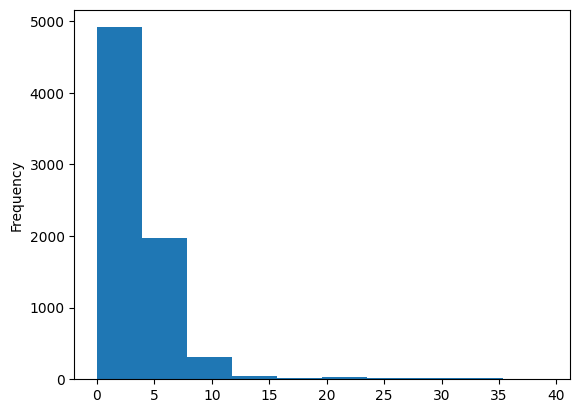

In [ ]:
bloodP_2015["Diastolic_SD"].plot(kind="hist")

Dejamos solo la media

In [ ]:
#Hacemos la media y SD de Systolic
bloodP_2015['Systolic_mean'] = bloodP_2015[['BPXSY1', 'BPXSY2', 'BPXSY3', 'BPXSY4']].mean(axis=1)
bloodP_2015['Systolic_SD'] = bloodP_2015[['BPXSY1', 'BPXSY2', 'BPXSY3', 'BPXSY4']].std(axis=1)

In [ ]:
bloodP_2015[['Systolic_mean', 'Systolic_SD']].head()

Systolic_mean  Systolic_SD
0     122.666667     6.110101
1     140.000000     6.000000
2     135.333333     3.055050
3     134.000000     2.000000
4     104.000000     8.717798

<Axes: ylabel='Frequency'>

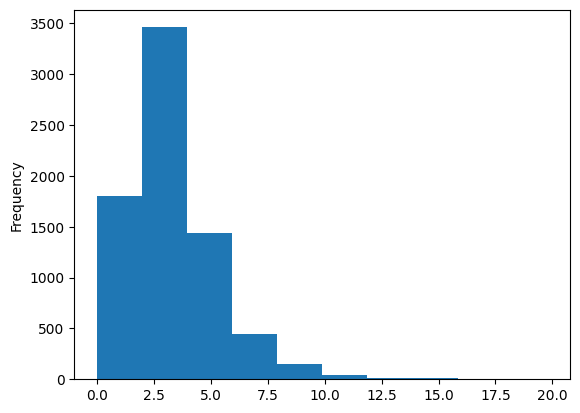

In [ ]:
bloodP_2015["Systolic_SD"].plot(kind="hist")

Nos quedamos solo con la media

In [ ]:
bloodP_2015 = bloodP_2015.drop(['BPXDI1', 'BPXDI2', 'BPXDI3', 'BPXDI4', 'BPXSY1', 'BPXSY2', 'BPXSY3', 'BPXSY4', 'Diastolic_SD', 'Systolic_SD'], axis=1)

In [ ]:
bloodP_2015.head()

SEQN  Pulse_mean  Diastolic_mean  Systolic_mean
0  83732.0        76.0       65.333333     122.666667
1  83733.0        72.0       86.000000     140.000000
2  83734.0        56.0       45.333333     135.333333
3  83735.0        78.0       70.000000     134.000000
4  83736.0        76.0       60.000000     104.000000

### Concat 2017-2020 y 2015-2016

In [ ]:
# Juntamos demo_2017 a demo_2015
bloodP = pd.concat([bloodP_2017, bloodP_2015], axis=0)

In [ ]:
bloodP.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21200 entries, 0 to 9543
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SEQN            21200 non-null  float64
 1   Systolic_mean   17716 non-null  float64
 2   Diastolic_mean  17716 non-null  float64
 3   Pulse_mean      16848 non-null  float64
dtypes: float64(4)
memory usage: 828.1 KB


In [ ]:
bloodP.head()

SEQN  Systolic_mean  Diastolic_mean  Pulse_mean
0  109264.0     108.000000       67.000000   93.333333
1  109266.0      99.000000       54.333333   66.666667
2  109270.0     124.666667       73.333333   95.333333
3  109271.0     107.000000       67.000000   71.333333
4  109273.0     113.666667       67.333333   70.333333

In [ ]:
bloodP_2015.isna().sum()

SEQN                 0
Pulse_mean        2168
Diastolic_mean    2181
Systolic_mean     2181
dtype: int64

In [ ]:
bloodP_2017.isna().sum()

SEQN                 0
Systolic_mean     1303
Diastolic_mean    1303
Pulse_mean        2184
dtype: int64

In [ ]:
bloodP.isna().sum()

SEQN                 0
Systolic_mean     3484
Diastolic_mean    3484
Pulse_mean        4352
dtype: int64

In [ ]:
bloodP.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21200 entries, 0 to 9543
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SEQN            21200 non-null  float64
 1   Systolic_mean   17716 non-null  float64
 2   Diastolic_mean  17716 non-null  float64
 3   Pulse_mean      16848 non-null  float64
dtypes: float64(4)
memory usage: 828.1 KB


## Body Measures (P_BMX)

In [ ]:
body_2017 = pd.read_csv("/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/P_BMX_2017.csv")
body_2015 = pd.read_csv("/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/BMX_I_2015.csv")

### Codebook 2017-2020

*   SEQN - Respondent sequence number
*   BMDSTATS - Body Measures Component Status Code
* BMXWT - Weight (kg)
* BMIWT - Weight Comment
* BMXRECUM - Recumbent Length (cm)
* BMIRECUM - Recumbent Length Comment
* BMXHEAD - Head Circumference (cm)
* BMIHEAD - Head Circumference Comment
* BMXHT - Standing Height (cm)
* BMIHT - Standing Height Comment
* BMXBMI - Body Mass Index (kg/m**2)
* BMDBMIC - BMI Category - Children/Youth
* BMXLEG - Upper Leg Length (cm)
* BMILEG - Upper Leg Length Comment
* BMXARML - Upper Arm Length (cm)
* BMIARML - Upper Arm Length Comment
* BMXARMC - Arm Circumference (cm)
* BMIARMC - Arm Circumference Comment
* BMXWAIST - Waist Circumference (cm)
* BMIWAIST - Waist Circumference Comment
* BMXSAD1 - Sagittal Abdominal Diameter 1st (cm)
* BMXSAD2 - Sagittal Abdominal Diameter 2nd (cm)
* BMXSAD3 - Sagittal Abdominal Diameter 3rd (cm)
* BMXSAD4 - Sagittal Abdominal Diameter 4th (cm)
* BMDAVSAD - Average Sagittal Abdominal Diameter (cm)
* BMDSADCM - Sagittal Abdominal Diameter Comment


Nos quedamos con todas

In [ ]:
body_2017.head()

SEQN  BMDSTATS  BMXWT  BMIWT  BMXRECUM  BMIRECUM  BMXHEAD  BMIHEAD  \
0  109263.0       4.0    NaN    NaN       NaN       NaN      NaN      NaN   
1  109264.0       1.0   42.2    NaN       NaN       NaN      NaN      NaN   
2  109265.0       1.0   12.0    NaN      91.6       NaN      NaN      NaN   
3  109266.0       1.0   97.1    NaN       NaN       NaN      NaN      NaN   
4  109269.0       3.0   13.6    NaN      90.9       NaN      NaN      NaN   

   BMXHT  BMIHT  ...  BMXLEG  BMILEG  BMXARML  BMIARML  BMXARMC  BMIARMC  \
0    NaN    NaN  ...     NaN     NaN      NaN      NaN      NaN      NaN   
1  154.7    NaN  ...    36.3     NaN     33.8      NaN     22.7      NaN   
2   89.3    NaN  ...     NaN     NaN     18.6      NaN     14.8      NaN   
3  160.2    NaN  ...    40.8     NaN     34.7      NaN     35.8      NaN   
4    NaN    1.0  ...     NaN     NaN      NaN      1.0      NaN      1.0   

   BMXWAIST  BMIWAIST  BMXHIP  BMIHIP  
0       NaN       NaN     NaN     NaN  
1      63.8       NaN    85.0     NaN  
2      41.2       NaN     NaN     NaN  
3     117.9       NaN   126.1     NaN  
4       NaN       1.0     NaN     NaN  

[5 rows x 22 columns]

In [ ]:
body_2017.shape

(14300, 22)

In [ ]:
body_2015.head()

SEQN  BMDSTATS  BMXWT  BMIWT  BMXRECUM  BMIRECUM  BMXHEAD  BMIHEAD  \
0  83732.0       1.0   94.8    NaN       NaN       NaN      NaN      NaN   
1  83733.0       1.0   90.4    NaN       NaN       NaN      NaN      NaN   
2  83734.0       1.0   83.4    NaN       NaN       NaN      NaN      NaN   
3  83735.0       1.0  109.8    NaN       NaN       NaN      NaN      NaN   
4  83736.0       3.0   55.2    NaN       NaN       NaN      NaN      NaN   

   BMXHT  BMIHT  ...  BMXARMC  BMIARMC  BMXWAIST  BMIWAIST  BMXSAD1  BMXSAD2  \
0  184.5    NaN  ...     35.9      NaN     101.1       NaN     22.9     22.7   
1  171.4    NaN  ...     33.2      NaN     107.9       NaN     27.5     27.1   
2  170.1    NaN  ...     31.0      NaN     116.5       NaN     26.7     26.5   
3  160.9    NaN  ...     38.3      NaN     110.1       NaN     25.2     25.0   
4  164.9    NaN  ...     27.2      NaN      80.4       NaN      NaN      NaN   

   BMXSAD3  BMXSAD4  BMDAVSAD  BMDSADCM  
0      NaN      NaN      22.8       NaN  
1      NaN      NaN      27.3       NaN  
2      NaN      NaN      26.6       NaN  
3      NaN      NaN      25.1       NaN  
4      NaN      NaN       NaN       NaN  

[5 rows x 26 columns]

In [ ]:
body_2015.shape

(9544, 26)

In [ ]:
body_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9544 entries, 0 to 9543
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      9544 non-null   float64
 1   BMDSTATS  9544 non-null   float64
 2   BMXWT     9445 non-null   float64
 3   BMIWT     443 non-null    float64
 4   BMXRECUM  1073 non-null   float64
 5   BMIRECUM  33 non-null     float64
 6   BMXHEAD   215 non-null    float64
 7   BMIHEAD   0 non-null      float64
 8   BMXHT     8769 non-null   float64
 9   BMIHT     105 non-null    float64
 10  BMXBMI    8756 non-null   float64
 11  BMDBMIC   3340 non-null   float64
 12  BMXLEG    7110 non-null   float64
 13  BMILEG    402 non-null    float64
 14  BMXARML   8976 non-null   float64
 15  BMIARML   420 non-null    float64
 16  BMXARMC   8976 non-null   float64
 17  BMIARMC   421 non-null    float64
 18  BMXWAIST  8313 non-null   float64
 19  BMIWAIST  489 non-null    float64
 20  BMXSAD1   6983 non-null   floa

Variables relevantes:
*   SEQN - Respondent sequence number
*   BMXWT - Weight (kg)
*   BMXHT - Standing Height (cm)
*   BMXBMI - Body Mass Index (kg/m**2)
*   BMXLEG - Upper Leg Length (cm)
*   BMXARML - Upper Arm Length (cm)
*   BMXARMC - Arm Circumference (cm)
*   BMXWAIST - Waist Circumference (cm)
*   BMXHIP - Hip Circumference (cm)


In [ ]:
#Primero cambiamos como se llama una variable que al finale es lo mismo. Hip Circumference
body_2015.rename(columns={'BMDAVSAD': 'BMXHIP'}, inplace=True)

In [ ]:
#Nos quedamos con las variables relevantes
body_2017 = body_2017[['SEQN', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST', 'BMXHIP']]
body_2015 = body_2015[['SEQN', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST', 'BMXHIP']]

In [ ]:
body_2017.head()

SEQN  BMXWT  BMXHT  BMXBMI  BMXLEG  BMXARML  BMXARMC  BMXWAIST  BMXHIP
0  109263.0    NaN    NaN     NaN     NaN      NaN      NaN       NaN     NaN
1  109264.0   42.2  154.7    17.6    36.3     33.8     22.7      63.8    85.0
2  109265.0   12.0   89.3    15.0     NaN     18.6     14.8      41.2     NaN
3  109266.0   97.1  160.2    37.8    40.8     34.7     35.8     117.9   126.1
4  109269.0   13.6    NaN     NaN     NaN      NaN      NaN       NaN     NaN

In [ ]:
body_2015.head()

SEQN  BMXWT  BMXHT  BMXBMI  BMXLEG  BMXARML  BMXARMC  BMXWAIST  BMXHIP
0  83732.0   94.8  184.5    27.8    43.3     43.6     35.9     101.1    22.8
1  83733.0   90.4  171.4    30.8    38.0     40.0     33.2     107.9    27.3
2  83734.0   83.4  170.1    28.8    35.6     37.0     31.0     116.5    26.6
3  83735.0  109.8  160.9    42.4    38.5     37.7     38.3     110.1    25.1
4  83736.0   55.2  164.9    20.3    37.4     36.0     27.2      80.4     NaN

### Concat 2017-2020 y 2015-2016

In [ ]:
# Juntamos 2017 a 2015
body = pd.concat([body_2017, body_2015], axis=0)

In [ ]:
body.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23844 entries, 0 to 9543
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      23844 non-null  float64
 1   BMXWT     23520 non-null  float64
 2   BMXHT     21926 non-null  float64
 3   BMXBMI    21893 non-null  float64
 4   BMXLEG    18094 non-null  float64
 5   BMXARML   22466 non-null  float64
 6   BMXARMC   22460 non-null  float64
 7   BMXWAIST  20887 non-null  float64
 8   BMXHIP    16845 non-null  float64
dtypes: float64(9)
memory usage: 1.8 MB


In [ ]:
body.head()

SEQN  BMXWT  BMXHT  BMXBMI  BMXLEG  BMXARML  BMXARMC  BMXWAIST  BMXHIP
0  109263.0    NaN    NaN     NaN     NaN      NaN      NaN       NaN     NaN
1  109264.0   42.2  154.7    17.6    36.3     33.8     22.7      63.8    85.0
2  109265.0   12.0   89.3    15.0     NaN     18.6     14.8      41.2     NaN
3  109266.0   97.1  160.2    37.8    40.8     34.7     35.8     117.9   126.1
4  109269.0   13.6    NaN     NaN     NaN      NaN      NaN       NaN     NaN

In [ ]:
body.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23844 entries, 0 to 9543
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      23844 non-null  float64
 1   BMXWT     23520 non-null  float64
 2   BMXHT     21926 non-null  float64
 3   BMXBMI    21893 non-null  float64
 4   BMXLEG    18094 non-null  float64
 5   BMXARML   22466 non-null  float64
 6   BMXARMC   22460 non-null  float64
 7   BMXWAIST  20887 non-null  float64
 8   BMXHIP    16845 non-null  float64
dtypes: float64(9)
memory usage: 1.8 MB


In [ ]:
#Renombrar columnas
body = body.rename(columns={'BMXWT': 'Weight', 'BMXHT': 'Height', 'BMXBMI': 'BMI', 'BMXLEG': 'Upper_Leg_Length', 'BMXARML': 'Upper_Arm_Length', 'BMXARMC': 'Arm_Circumference', 'BMXWAIST': 'Waist_Circumference', 'BMXHIP': 'Hip_Circumference'})

In [ ]:
body.head()

SEQN  Weight  Height   BMI  Upper_Leg_Length  Upper_Arm_Length  \
0  109263.0     NaN     NaN   NaN               NaN               NaN   
1  109264.0    42.2   154.7  17.6              36.3              33.8   
2  109265.0    12.0    89.3  15.0               NaN              18.6   
3  109266.0    97.1   160.2  37.8              40.8              34.7   
4  109269.0    13.6     NaN   NaN               NaN               NaN   

   Arm_Circumference  Waist_Circumference  Hip_Circumference  
0                NaN                  NaN                NaN  
1               22.7                 63.8               85.0  
2               14.8                 41.2                NaN  
3               35.8                117.9              126.1  
4                NaN                  NaN                NaN

In [ ]:
body.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23844 entries, 0 to 9543
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SEQN                 23844 non-null  float64
 1   Weight               23520 non-null  float64
 2   Height               21926 non-null  float64
 3   BMI                  21893 non-null  float64
 4   Upper_Leg_Length     18094 non-null  float64
 5   Upper_Arm_Length     22466 non-null  float64
 6   Arm_Circumference    22460 non-null  float64
 7   Waist_Circumference  20887 non-null  float64
 8   Hip_Circumference    16845 non-null  float64
dtypes: float64(9)
memory usage: 1.8 MB


In [ ]:
#Guardar dataset demo en la carpeta EXCEL_FILE_FILTERED
body.to_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/EXAMINATION.csv', index=False)

In [ ]:
#Adjuntamos la bloodP dataset EXAMINATION.CSV usando SEQN como identificador comun
examination_df = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/EXAMINATION.csv')
pd.merge(examination_df, bloodP, on='SEQN', how='left').to_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/EXAMINATION.csv', index=False)

In [ ]:
# Comprobamos que la columna se ha añadido bien
examination_df = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/EXAMINATION.csv')
examination_df.head()

SEQN  Weight  Height   BMI  Upper_Leg_Length  Upper_Arm_Length  \
0  109263.0     NaN     NaN   NaN               NaN               NaN   
1  109264.0    42.2   154.7  17.6              36.3              33.8   
2  109265.0    12.0    89.3  15.0               NaN              18.6   
3  109266.0    97.1   160.2  37.8              40.8              34.7   
4  109269.0    13.6     NaN   NaN               NaN               NaN   

   Arm_Circumference  Waist_Circumference  Hip_Circumference  Systolic_mean  \
0                NaN                  NaN                NaN            NaN   
1               22.7                 63.8               85.0          108.0   
2               14.8                 41.2                NaN            NaN   
3               35.8                117.9              126.1           99.0   
4                NaN                  NaN                NaN            NaN   

   Diastolic_mean  Pulse_mean  
0             NaN         NaN  
1       67.000000   93.333333  
2             NaN         NaN  
3       54.333333   66.666667  
4             NaN         NaN

In [ ]:
examination_df.shape

(23844, 12)

##Comprobacion

In [ ]:
examination_df = pd.read_csv('/content/drive/MyDrive/NUCLIO/M7 - TFM/EXCEL_FILES/EXCEL_FILES_FILTERED/EXAMINATION.csv')
examination_df.head()

SEQN  Weight  Height   BMI  Upper_Leg_Length  Upper_Arm_Length  \
0  109263.0     NaN     NaN   NaN               NaN               NaN   
1  109264.0    42.2   154.7  17.6              36.3              33.8   
2  109265.0    12.0    89.3  15.0               NaN              18.6   
3  109266.0    97.1   160.2  37.8              40.8              34.7   
4  109269.0    13.6     NaN   NaN               NaN               NaN   

   Arm_Circumference  Waist_Circumference  Hip_Circumference  Systolic_mean  \
0                NaN                  NaN                NaN            NaN   
1               22.7                 63.8               85.0          108.0   
2               14.8                 41.2                NaN            NaN   
3               35.8                117.9              126.1           99.0   
4                NaN                  NaN                NaN            NaN   

   Diastolic_mean  Pulse_mean  
0             NaN         NaN  
1       67.000000   93.333333  
2             NaN         NaN  
3       54.333333   66.666667  
4             NaN         NaN

In [ ]:
examination_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23844 entries, 0 to 23843
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SEQN                 23844 non-null  float64
 1   Weight               23520 non-null  float64
 2   Height               21926 non-null  float64
 3   BMI                  21893 non-null  float64
 4   Upper_Leg_Length     18094 non-null  float64
 5   Upper_Arm_Length     22466 non-null  float64
 6   Arm_Circumference    22460 non-null  float64
 7   Waist_Circumference  20887 non-null  float64
 8   Hip_Circumference    16845 non-null  float64
 9   Systolic_mean        17716 non-null  float64
 10  Diastolic_mean       17716 non-null  float64
 11  Pulse_mean           16848 non-null  float64
dtypes: float64(12)
memory usage: 2.2 MB
